AMD 3/7/2024
I asked Claude 3.0 for help writing code to expand the dynamic range of image sets taken on the IR VIVO preclinical imager -- we need to input a cube of dark counts (an image for each of the exposure times) as well as the data sets taken at a range of exposure times (I integrated the darkcount subtraction into this program to reduce the amount of time it takes to collect and save data on the imager while we are collecting data. Hopefully this also ensures that we get the data that we need without the imager software crashing...)

In [1]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
import xarray as xr

In [7]:
# Enter the file paths and exposure times here
file1_path = '/Users/allisondennis/Library/CloudStorage/OneDrive-NortheasternUniversity/AMD/IR VIVO data/231216_mirrors/231216_capillaries_BP_air_0_1.h5'
file1_exposure_time = 0.1
# open the h5 file
h5_file1 = h5.File(file1_path, 'r')

print("TimeExposure: ", h5_file1['Cube']['TimeExposure'][0:10])
print("Wavelength: ", h5_file1['Cube']['Wavelength'][0:10])

file2_path = '/Users/allisondennis/Library/CloudStorage/OneDrive-NortheasternUniversity/AMD/IR VIVO data/231216_mirrors/231216_capillaries_BP_air_0_05.h5'
file2_exposure_time = 0.05
# open the h5 file
h5_file2 = h5.File(file2_path, 'r')

print("TimeExposure: ", h5_file2['Cube']['TimeExposure'][0:10])
print("Wavelength: ", h5_file2['Cube']['Wavelength'][0:10])

file3_path = '/Users/allisondennis/Library/CloudStorage/OneDrive-NortheasternUniversity/AMD/IR VIVO data/231216_mirrors/231216_capillaries_BP_air_0_01.h5'
file3_exposure_time = 0.01
# open the h5 file
h5_file3 = h5.File(file3_path, 'r')

print("TimeExposure: ", h5_file3['Cube']['TimeExposure'][0:10])
print("Wavelength: ", h5_file3['Cube']['Wavelength'][0:10])

#num_filters = 6

output_file = '231216_capillaries_BP_air_hdr.npy'

TimeExposure:  [0.1 0.1 0.1 0.1 0.1 0.1]
Wavelength:  [b'1100' b'1150' b'1300' b'1350' b'1500' b'1550']
TimeExposure:  [0.05 0.05 0.05 0.05 0.05 0.05]
Wavelength:  [b'1100' b'1150' b'1300' b'1350' b'1500' b'1550']
TimeExposure:  [0.01 0.01 0.01 0.01 0.01 0.01]
Wavelength:  [b'1100' b'1150' b'1300' b'1350' b'1500' b'1550']


In [4]:
print("TimeExposure: ", h5_file1['Cube']['TimeExposure'][0:10])
print("Wavelength: ", h5_file1['Cube']['Wavelength'][0:10])

print("TimeExposure: ", h5_file2['Cube']['TimeExposure'][0:10])
print("Wavelength: ", h5_file2['Cube']['Wavelength'][0:10])

print("TimeExposure: ", h5_file3['Cube']['TimeExposure'][0:10])
print("Wavelength: ", h5_file3['Cube']['Wavelength'][0:10])

TimeExposure:  [0.1 0.1 0.1 0.1 0.1 0.1]
Wavelength:  [b'1100' b'1150' b'1300' b'1350' b'1500' b'1550']
TimeExposure:  [0.05 0.05 0.05 0.05 0.05 0.05]
Wavelength:  [b'1100' b'1150' b'1300' b'1350' b'1500' b'1550']
TimeExposure:  [0.01 0.01 0.01 0.01 0.01 0.01]
Wavelength:  [b'1100' b'1150' b'1300' b'1350' b'1500' b'1550']


In [10]:
img_data1 = h5_file1['Cube']['Images']
wavelengths1 = h5_file1['Cube']['Wavelength']
print("Shape of the first image data is: ", img_data1.shape)

img_data2 = h5_file2['Cube']['Images']
wavelengths2 = h5_file2['Cube']['Wavelength']
print("Shape of the first image data is: ", img_data2.shape)

img_data3 = h5_file3['Cube']['Images']
wavelengths3 = h5_file3['Cube']['Wavelength']
print("Shape of the first image data is: ", img_data3.shape)

Shape of the first image data is:  (6, 640, 512)
Shape of the first image data is:  (6, 640, 512)


NameError: name 'img_data3' is not defined

In [9]:

def aggregate_exposures(images, exposure_times):
    print("Aggregating exposures...")
    print(f"Number of images: {len(images)}")
    print(f"Image shape: {images[0].shape}")
    
    # Convert exposure times to relative radiance values
    radiance_values = np.log(exposure_times)
    print(f"Radiance values: {radiance_values}")
    
    # Initialize the HDR image
    hdr_image = np.zeros(images[0].shape, dtype=np.float32)
    print(f"Initialized HDR image with shape: {hdr_image.shape}")
    
    # Iterate over each pixel in the images
    for i in range(images[0].shape[0]):
        # Collect pixel values from all images
        pixel_values = np.array([img[i] for img in images], dtype=np.float32)
        print(f"Pixel values at index {i}: {pixel_values}")
        
        # Perform weighted average based on radiance values
        weights = np.exp(radiance_values - np.max(radiance_values))
        weighted_sum = np.sum(weights * pixel_values)
        weight_sum = np.sum(weights)
        print(f"Weighted sum at index {i}: {weighted_sum}")
        print(f"Weight sum at index {i}: {weight_sum}")
        
        # Assign the aggregated value to the HDR image
        hdr_image[i] = weighted_sum / weight_sum
    
    print(f"Aggregated HDR image: {hdr_image}")
    return hdr_image

Processing files...
Filter names: ['Cube']
First filter group: <HDF5 group "/Cube" (7 members)>
First dataset name: Angle
Image shape: (6,)
Initialized HDR image cube with shape: (1, 6)
Processing filter: Cube
Extracted image with shape (6,) from file /Users/allisondennis/Library/CloudStorage/OneDrive-NortheasternUniversity/AMD/IR VIVO data/231216_mirrors/231216_capillaries_BP_air_0_1.h5
Extracted image with shape (6,) from file /Users/allisondennis/Library/CloudStorage/OneDrive-NortheasternUniversity/AMD/IR VIVO data/231216_mirrors/231216_capillaries_BP_air_0_05.h5
Extracted image with shape (6,) from file /Users/allisondennis/Library/CloudStorage/OneDrive-NortheasternUniversity/AMD/IR VIVO data/231216_mirrors/231216_capillaries_BP_air_0_01.h5


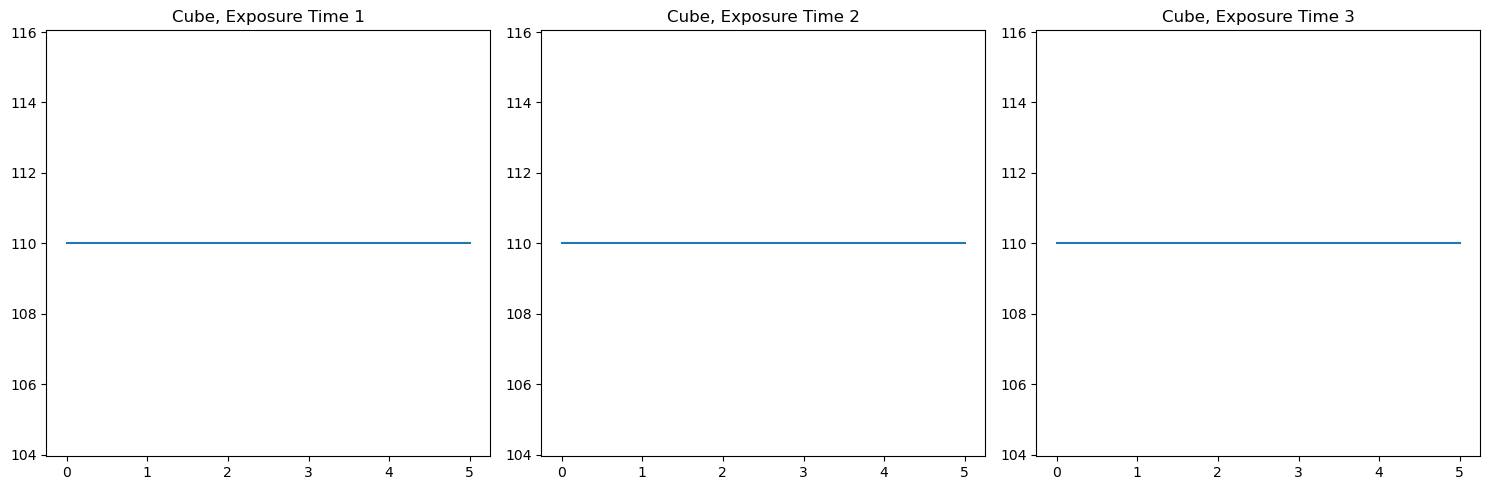

Aggregating exposures...
Number of images: 3
Image shape: (6,)
Radiance values: [-2.30258509 -2.99573227 -4.60517019]
Initialized HDR image with shape: (6,)
Pixel values at index 0: [110. 110. 110.]
Weighted sum at index 0: 176.0
Weight sum at index 0: 1.6
Pixel values at index 1: [110. 110. 110.]
Weighted sum at index 1: 176.0
Weight sum at index 1: 1.6
Pixel values at index 2: [110. 110. 110.]
Weighted sum at index 2: 176.0
Weight sum at index 2: 1.6
Pixel values at index 3: [110. 110. 110.]
Weighted sum at index 3: 176.0
Weight sum at index 3: 1.6
Pixel values at index 4: [110. 110. 110.]
Weighted sum at index 4: 176.0
Weight sum at index 4: 1.6
Pixel values at index 5: [110. 110. 110.]
Weighted sum at index 5: 176.0
Weight sum at index 5: 1.6
Aggregated HDR image: [110. 110. 110. 110. 110. 110.]
Normalized HDR image for filter Cube: [0 0 0 0 0 0]


/var/folders/gx/4gwwyrv10n9f3d2zmm71n9pm0000gq/T/ipykernel_21393/508940656.py:48: RuntimeWarning: invalid value encountered in divide
  hdr_image_normalized = (hdr_image - np.min(hdr_image)) / (np.max(hdr_image) - np.min(hdr_image))
/var/folders/gx/4gwwyrv10n9f3d2zmm71n9pm0000gq/T/ipykernel_21393/508940656.py:49: RuntimeWarning: invalid value encountered in cast
  hdr_image_normalized = (hdr_image_normalized * 65535).astype(np.uint16)


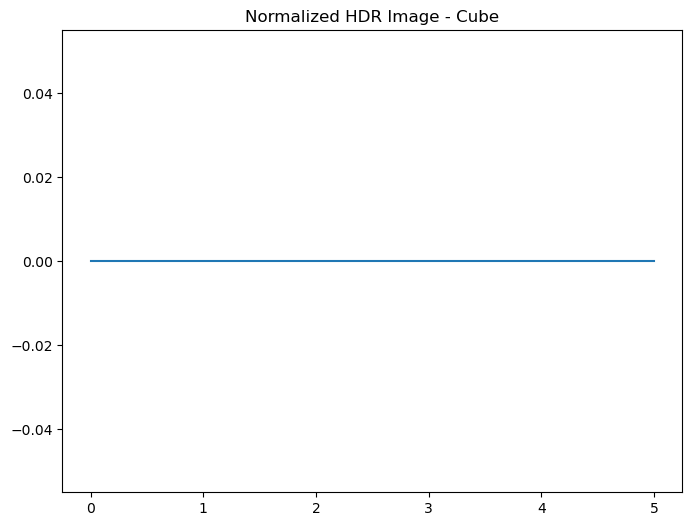

Saved HDR image cube to hdr_image_cube.npy


In [11]:

def process_files(image_files, exposure_times):
    print("Processing files...")
    
    # Extract the filter names from the first h5 file
    with h5py.File(image_files[0], 'r') as f:
        filter_names = list(f.keys())
        print(f"Filter names: {filter_names}")

    # Extract the image shape from the first filter of the first h5 file
    with h5py.File(image_files[0], 'r') as f:
        first_filter_group = f[filter_names[0]]
        print(f"First filter group: {first_filter_group}")
        first_dataset_name = list(first_filter_group.keys())[0]
        print(f"First dataset name: {first_dataset_name}")
        image_shape = first_filter_group[first_dataset_name].shape
        print(f"Image shape: {image_shape}")

    # Initialize the HDR image cube
    hdr_image_cube = np.zeros((len(filter_names), image_shape[0]), dtype=np.float32)
    print(f"Initialized HDR image cube with shape: {hdr_image_cube.shape}")

    # Process each filter
    for i, filter_name in enumerate(filter_names):
        print(f"Processing filter: {filter_name}")
        
        # Extract images from each exposure time for the current filter
        images = []
        for j in range(len(image_files)):
            with h5py.File(image_files[j], 'r') as f:
                filter_group = f[filter_name]
                dataset_name = list(filter_group.keys())[0]
                image = np.array(filter_group[dataset_name])
                images.append(image)
                print(f"Extracted image with shape {image.shape} from file {image_files[j]}")
        
        # Display the original images for the current filter
        fig, axs = plt.subplots(1, len(image_files), figsize=(15, 5))
        for j, img in enumerate(images):
            axs[j].plot(img)
            axs[j].set_title(f'{filter_name}, Exposure Time {j+1}')
        plt.tight_layout()
        plt.show()
        
        # Aggregate pixel values from multiple exposures for the current filter
        hdr_image = aggregate_exposures(images, exposure_times)
        
        # Normalize the HDR image for display
        hdr_image_normalized = (hdr_image - np.min(hdr_image)) / (np.max(hdr_image) - np.min(hdr_image))
        hdr_image_normalized = (hdr_image_normalized * 65535).astype(np.uint16)
        print(f"Normalized HDR image for filter {filter_name}: {hdr_image_normalized}")
        
        # Assign the HDR image to the corresponding slice in the HDR image cube
        hdr_image_cube[i] = hdr_image_normalized
        
        # Display the normalized HDR image for the current filter
        plt.figure(figsize=(8, 6))
        plt.plot(hdr_image_normalized)
        plt.title(f'Normalized HDR Image - {filter_name}')
        plt.show()

    # Save the HDR image cube
    np.save(output_file, hdr_image_cube)
    print(f"Saved HDR image cube to {output_file}")

# Process the files
image_files = [file1_path, file2_path, file3_path]
exposure_times = [file1_exposure_time, file2_exposure_time, file3_exposure_time]
process_files(image_files, exposure_times)